In [1]:
from numpy import genfromtxt
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import binary_opening, binary_closing,binary_erosion, rectangle, binary_dilation, disk
from skimage.segmentation import find_boundaries

# From Converted RJPEG To Temperature csv

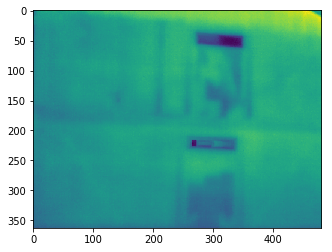

In [117]:
thermal_tab = genfromtxt('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Veracruz/Thermal_preproc/temperature_DJI_0866.csv', delimiter=',')
# thermal_tab = np.rot90(thermal_tab,3)
# exclude the bottom right column because of some noise
# thermal_tab = thermal_tab[0:147,0:485]
plt.figure()
plt.imshow(thermal_tab)

In [ ]:
thermal_tab = genfromtxt('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Veracruz/Thermal_preproc/temperature_DJI_0490_door.csv', delimiter=',')
#thermal_tab = genfromtxt('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Veracruz/Thermal_preproc/IX-x1-00057_0278_0109_THM_roof.csv', delimiter=',')

# thermal_tab = np.rot90(thermal_tab,3)
# exclude the bottom right column because of some noise
# thermal_tab = thermal_tab[0:147,0:485]
plt.figure()
plt.imshow(thermal_tab)

In [148]:
thermal_tab.shape

(343, 280)

In [149]:
np.amax(thermal_tab)

17.0045756888981

In [150]:
np.amin(thermal_tab)

-8.58709785285782

In [151]:
9/2

4.5

In [214]:
import json
data = json.load(open('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/singapour/masks_thm/IX-x1-00057_0278_0109_THM.json'))

In [215]:
objects = data.get("objects")[0]

In [216]:
points_lab = objects['points']

In [217]:
nested_lists = points_lab['exterior']

In [218]:
nested_lst_of_tuples = [tuple(l) for l in nested_lists]

In [219]:
nested_lst_of_tuples

[(254, 0),
 (257, 63),
 (244, 62),
 (250, 140),
 (265, 139),
 (290, 511),
 (0, 511),
 (0, 164),
 (131, 150),
 (129, 76),
 (13, 87),
 (11, 0)]

In [220]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageChops

In [221]:
original=Image.open('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/singapour/Thermal/IX-x1-00057_0278_0109_THM.JPG')

In [222]:
original.size

(640, 512)

In [253]:
def getMask(original,polygon):
    #Returns the mask of the polygon
    mask = Image.new('L', original.size, 0)
    mask_draw = ImageDraw.Draw(mask)
    mask_draw.polygon(polygon, outline=1, fill=1)
    return np.array(mask)

In [254]:
mask = getMask(original,nested_lst_of_tuples)

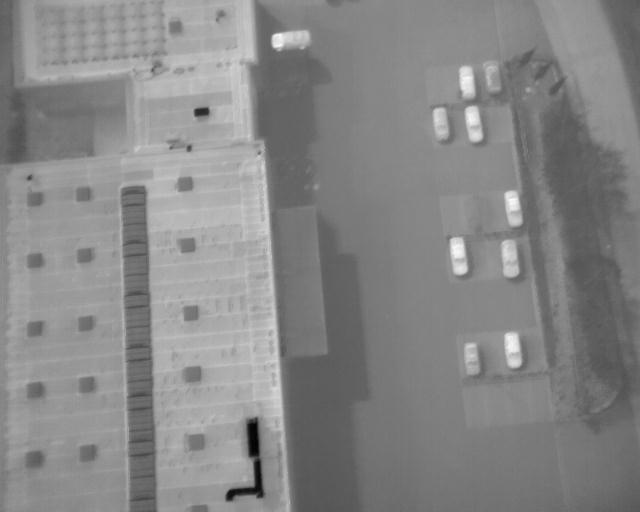

In [255]:
original

In [272]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

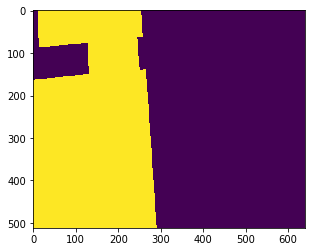

In [257]:
plt.figure()
plt.imshow(mask)

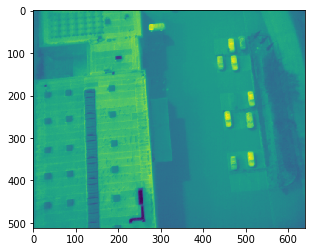

In [262]:

thermal_tab = genfromtxt("/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/singapour/Thermal_preproc/IX-x1-00057_0278_0109_THM.csv", delimiter=',')

# thermal_tab = np.rot90(thermal_tab,3)
# exclude the bottom right column because of some noise
# thermal_tab = thermal_tab[0:147,0:485]
plt.figure()
plt.imshow(thermal_tab)

In [265]:
thermal_tab.shape

(512, 640)

In [267]:
mask_b.shape

(512, 640)

In [275]:
mask_b

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [289]:
diff = thermal_tab*mask_b

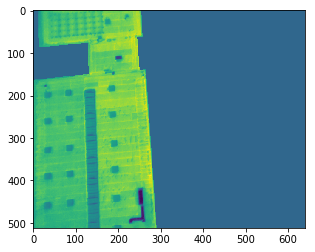

In [290]:
plt.figure()
plt.imshow(diff)

In [291]:
mask_b_inv = np.invert(mask_b)

In [295]:
mask_b_inv*-999.0

array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [  -0.,   -0.,   -0., ..., -999., -999., -999.],
       [  -0.,   -0.,   -0., ..., -999., -999., -999.],
       [  -0.,   -0.,   -0., ..., -999., -999., -999.]])

In [298]:
ones_np = np.ones((512,640))


In [302]:
diff2 = -999*(mask_b_inv * ones_np)

In [303]:
diff2

array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [  -0.,   -0.,   -0., ..., -999., -999., -999.],
       [  -0.,   -0.,   -0., ..., -999., -999., -999.],
       [  -0.,   -0.,   -0., ..., -999., -999., -999.]])

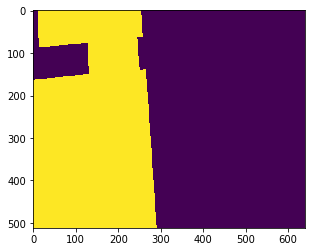

In [307]:
plt.figure()
plt.imshow(diff2)

In [306]:
# diff = ImageChops.lighter(original, mask)

In [323]:
thermal_tab_b=diff2 != -999

In [325]:
thermal_tab_b

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [333]:
diff3 = diff[thermal_tab_b]

In [334]:
diff3.shape


(128201,)

In [335]:
diff3

array([ 3.26242192,  3.54370322,  4.50839181, ..., 12.07775892,
       10.88682735,  8.74663077])

In [336]:
pixel_values = diff3.reshape((-1, 1))

In [349]:
diff

array([[-999.        , -999.        , -999.        , ..., -999.        ,
        -999.        , -999.        ],
       [-999.        , -999.        , -999.        , ..., -999.        ,
        -999.        , -999.        ],
       [-999.        , -999.        , -999.        , ..., -999.        ,
        -999.        , -999.        ],
       ...,
       [   6.43093124,    6.2578872 ,    6.33209054, ..., -999.        ,
        -999.        , -999.        ],
       [   5.86107554,    5.88592884,    6.38152474, ..., -999.        ,
        -999.        , -999.        ],
       [   5.53733978,    5.53733978,    5.56228506, ..., -999.        ,
        -999.        , -999.        ]])

In [337]:
pixel_values


array([[ 3.26242192],
       [ 3.54370322],
       [ 4.50839181],
       ...,
       [12.07775892],
       [10.88682735],
       [ 8.74663077]])

In [338]:
#pixel_values = thermal_tab.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

In [339]:
pixel_values.shape

(128201, 1)

In [340]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [341]:
# number of clusters (K)
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [342]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [343]:
centers

array([[252],
       [  4],
       [ 12],
       [  9]], dtype=uint8)

In [317]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

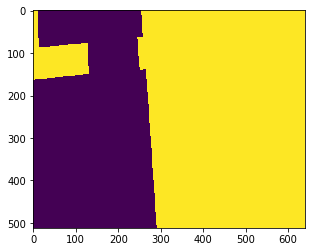

In [318]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(thermal_tab.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [319]:
#thermal_tab = segmented_image

In [348]:
labels.flatten().shape

(128201,)

In [320]:
segmented_image

array([[27, 27, 27, ..., 27, 27, 27],
       [27, 27, 27, ..., 27, 27, 27],
       [27, 27, 27, ..., 27, 27, 27],
       ...,
       [ 0,  0,  0, ..., 27, 27, 27],
       [ 0,  0,  0, ..., 27, 27, 27],
       [ 0,  0,  0, ..., 27, 25, 25]], dtype=uint8)

In [321]:
centers

array([[25],
       [27],
       [ 0],
       [25]], dtype=uint8)

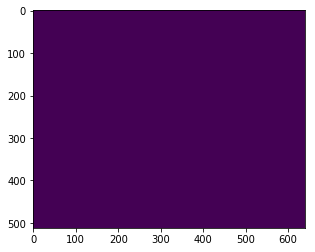

In [322]:
th = cv2.threshold(thermal_tab,0,255,cv2.THRESH_BINARY)[1]
thresholded = th.astype(np.uint8)
thresholded = np.invert(thresholded)
plt.figure()
plt.imshow(thresholded)

In [164]:
thresholded = binary_dilation(thresholded, rectangle(1,5))

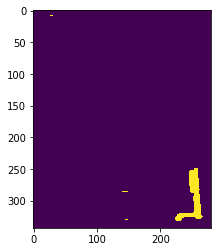

In [165]:
plt.figure()
plt.imshow(thresholded)

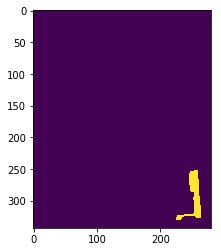

In [166]:
thresholded = binary_erosion(thresholded, rectangle(5,1))
plt.figure()
plt.imshow(thresholded)

In [167]:
# borders = find_boundaries(thresholded)
# plt.figure()
# plt.imshow(borders)

In [168]:
#print(borders)

In [169]:
thresholded_2 = thresholded.astype(np.uint8)
contours, hierarchy = cv2.findContours(thresholded_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

### Create RGB images

In [170]:
thermal_im = 255*(thermal_tab - np.min(thermal_tab))/np.ptp(thermal_tab).astype(int)

In [171]:
thermal_im = cv2.cvtColor(thermal_im.astype(np.uint8),cv2.COLOR_GRAY2RGB)

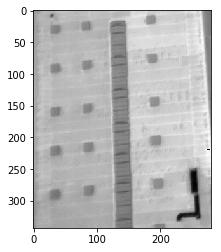

In [172]:
plt.figure()
plt.imshow(thermal_im)

In [173]:
mask = np.zeros(thermal_im.shape, np.uint8)
borders_im = cv2.drawContours(mask, contours, -1, (255,0,0),3)

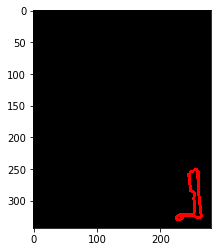

In [174]:
plt.figure()
plt.imshow(borders_im)

In [175]:
# borders_im = borders*255
# borders_im= cv2.cvtColor(borders_im.astype(np.uint8),cv2.COLOR_GRAY2RGB)
# # Red color
# borders_im[:, :, (1, 2)] = 0
# plt.figure()
# plt.imshow(borders_im)

#### superimpose images


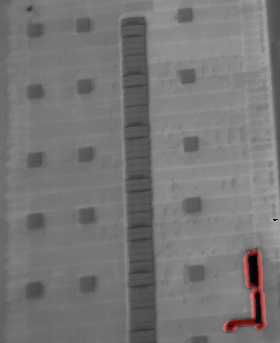

In [176]:
thermal_im_1 = Image.fromarray(thermal_im)
borders_im_1 = Image.fromarray(borders_im)
thermal_im_1 = thermal_im_1.convert("RGBA")
borders_im_1 = borders_im_1.convert("RGBA")
new_img = Image.blend(thermal_im_1, borders_im_1, 0.35)
new_img

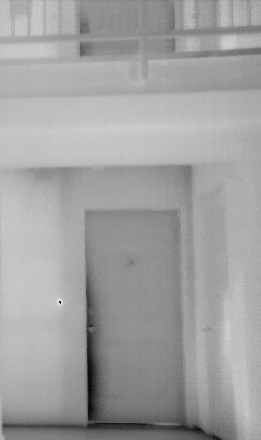

In [25]:
thermal_im_1

In [26]:
new_img_jpeg = new_img.convert("RGB")

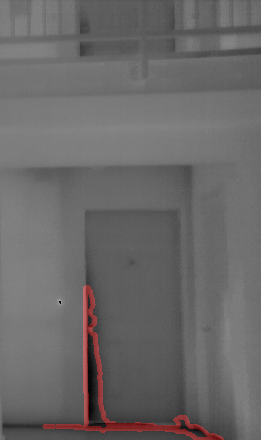

In [27]:
new_img_jpeg

In [285]:
new_img_jpeg.save('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/temperature2_seg.jpeg')


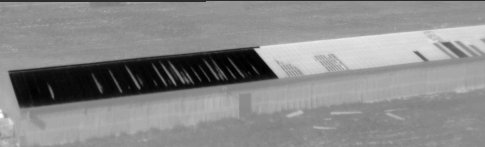

In [286]:
thermal_im_1_jpeg = thermal_im_1.convert("RGB")
thermal_im_1_jpeg

In [287]:
thermal_im_1_jpeg.save('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/temperature2.jpeg')


# From Converted TIFF to PNG

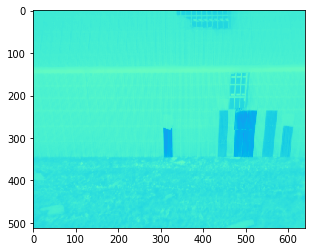

In [236]:
im_path_png = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/03-12-2020/Thermal_png_rainbow/DJI_0168.tif.png"
thermal_png = Image.open(im_path_png)
plt.figure()
plt.imshow(thermal_png)

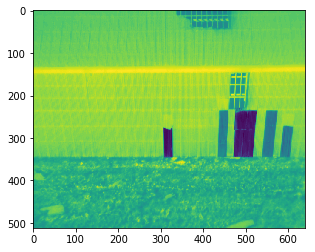

In [237]:
from matplotlib import pyplot as plt
r, g, b, _ = thermal_png.split()

ra = np.array(r)
ga = np.array(g)
ba = np.array(b)

gray = (0.299*ra + 0.587*ga + 0.114*ba)

plt.figure()
plt.imshow(gray)


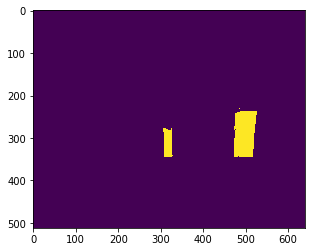

In [238]:
th = cv2.threshold(gray,148,255,cv2.THRESH_BINARY)[1]
thresholded = th.astype(np.uint8)
thresholded = np.invert(thresholded)
plt.figure()
plt.imshow(thresholded)

In [239]:
thresholded = binary_dilation(thresholded, rectangle(1,5))

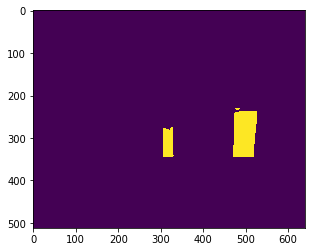

In [240]:
plt.figure()
plt.imshow(thresholded)

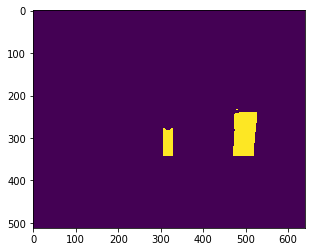

In [241]:
thresholded = binary_erosion(thresholded, rectangle(5,1))
plt.figure()
plt.imshow(thresholded)

In [242]:
# borders = find_boundaries(thresholded,connectivity=1)
# plt.figure()
# plt.imshow(borders)

In [244]:
thresholded_2 = thresholded.astype(np.uint8)
contours, hierarchy = cv2.findContours(thresholded_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

### Create RGB images

In [245]:
thermal_im = cv2.cvtColor(gray.astype(np.uint8),cv2.COLOR_GRAY2RGB)

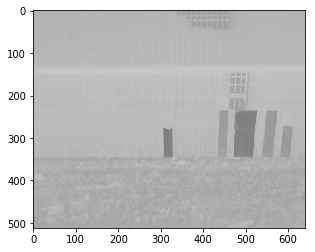

In [246]:
plt.figure()
plt.imshow(thermal_im)

In [248]:
mask = np.zeros(thermal_im.shape, np.uint8)
borders_im = cv2.drawContours(mask, contours, -1, (255,0,0),3)

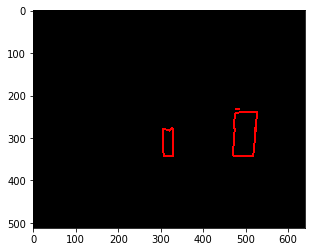

In [249]:
plt.figure()
plt.imshow(borders)

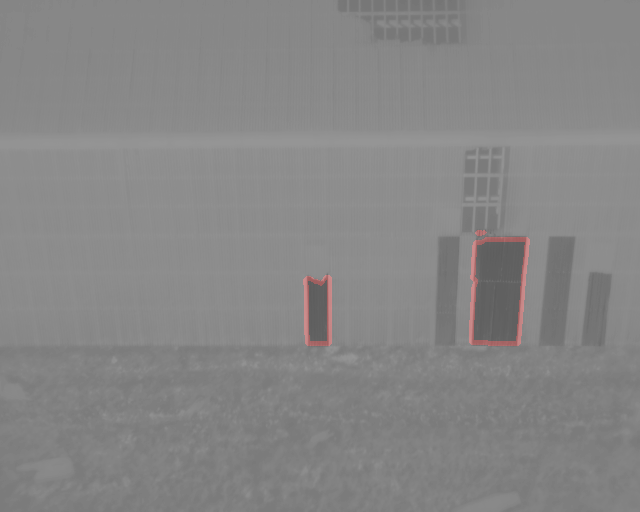

In [251]:
thermal_im_1 = Image.fromarray(thermal_im)
borders_im_1 = Image.fromarray(borders_im)
thermal_im_1 = thermal_im_1.convert("RGBA")
borders_im_1 = borders_im_1.convert("RGBA")
new_img = Image.blend(thermal_im_1, borders_im_1, 0.25)
new_img

In [252]:
new_img_jpeg = new_img.convert("RGB")

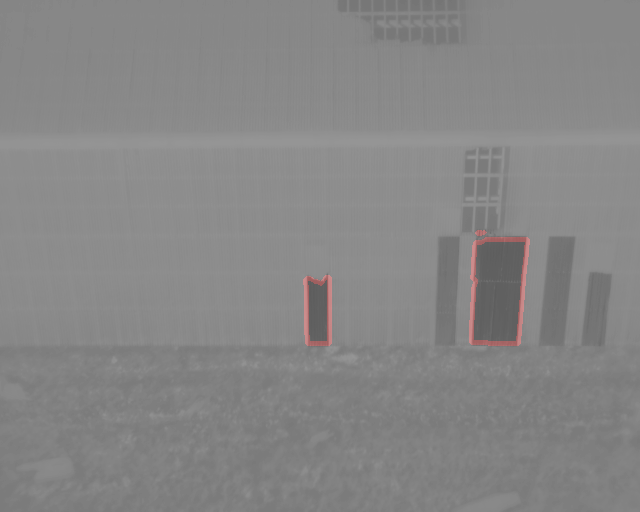

In [253]:
new_img_jpeg

In [255]:

new_img_jpeg.save('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/DJI_0168_seg.jpeg')


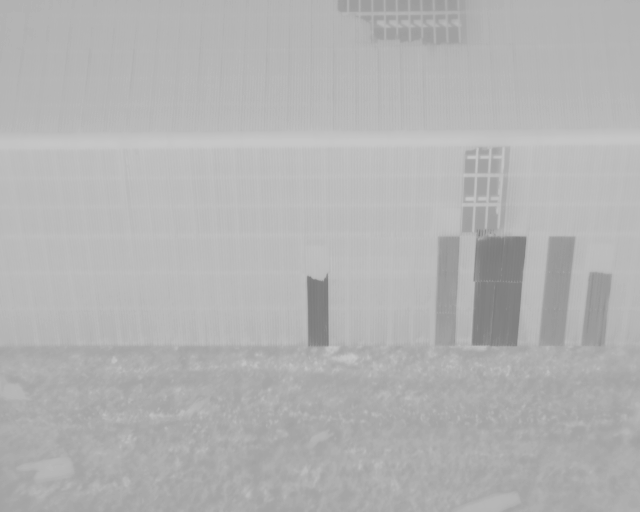

In [256]:
thermal_im_1_jpeg = thermal_im_1.convert("RGB")
thermal_im_1_jpeg

In [257]:
thermal_im_1_jpeg.save('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/DJI_0168.jpeg')
